In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
barbie = pd.read_csv(r'desktop/barbieverse.csv')

# Display the first few rows of the dataframe to understand its structure
print(barbie.head())

# Display the dataframe columns to see what data is available
print(barbie.columns)

   No.  Movie  No. Character     Character Name Barbie Cast     Skin Tone  \
0           1              1             Barbie      Barbie  Light Medium   
1           1              2  Aunt Drosselmayer         NaN         Light   
2           1              3      Captain Candy         NaN   Medium Deep   
3           1              4              Clara      Barbie  Light Medium   
4           1              5     Flower Faeries         NaN  Light Medium   

         Eyes        Hair  Gender          Race     Speaking Voice  \
0        Blue      Blonde  Female         Human     Kelly Sheridan   
1       Green       Brown  Female         Human      Kathleen Barr   
2        Deep       Brown    Male         Human  Ian James Corlett   
3        Blue      Blonde  Female         Human     Kelly Sheridan   
4  Multicolor  Multicolor  Female  Flower Fairy    Shona Galbraith   

  Singing Voice  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN  
Index(['

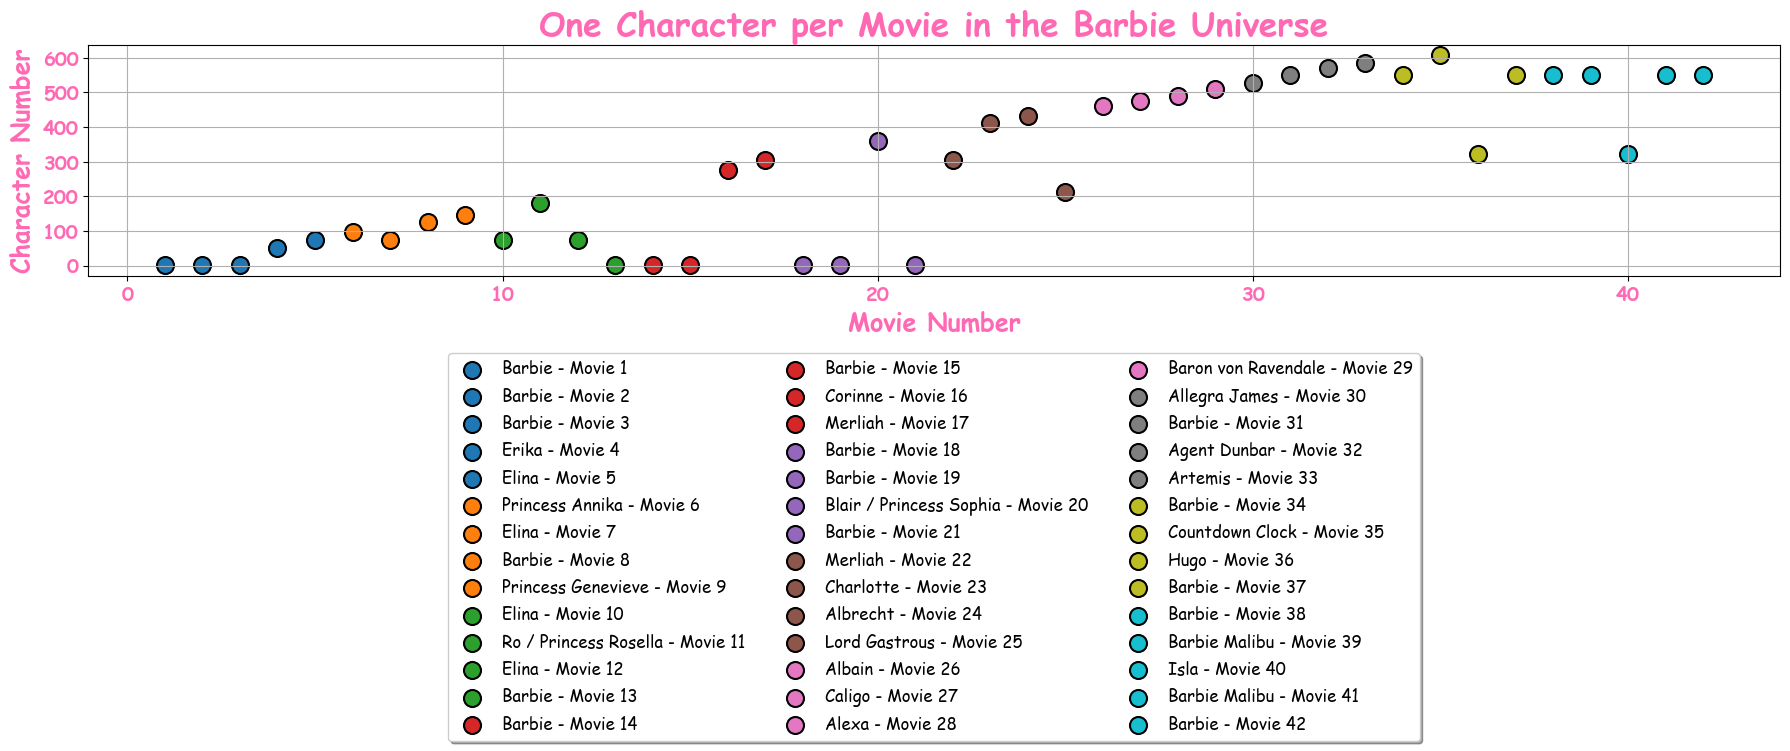

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
barbie = pd.read_csv("desktop/barbieverse.csv")

# Define custom Barbie color palette with shades of pink for each movie
num_movies = len(barbie['No.  Movie'].unique())
barbie_colors = plt.cm.tab10(np.linspace(0, 1, num_movies))

# Set Barbie font
plt.rcParams['font.family'] = 'Comic Sans MS'

# Create scatter plot for one character per movie
plt.figure(figsize=(18, 9))  # Set a large figure size

for movie, data in barbie.groupby('No.  Movie'):
    character = data.iloc[0]  # Select the first character in each movie
    plt.scatter(character['No.  Movie'], character['No. Character'], label=f'{character["Character Name"]} - Movie {movie}',
                color=barbie_colors[movie-1], s=150, marker='o', edgecolors='black', linewidths=1.5)

plt.title('One Character per Movie in the Barbie Universe', fontsize=24, fontweight='bold', color='#FF69B4')
plt.xlabel('Movie Number', fontsize=18, fontweight='bold', color='#FF69B4')
plt.ylabel('Character Number', fontsize=18, fontweight='bold', color='#FF69B4')
plt.xticks(fontsize=14, fontweight='bold', color='#FF69B4')
plt.yticks(fontsize=14, fontweight='bold', color='#FF69B4')
plt.grid(True)

# Move the legend to the bottom and adjust its position
plt.legend(fontsize=12, loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=3)
plt.tight_layout()  # Adjust layout to fit the entire figure
plt.show()


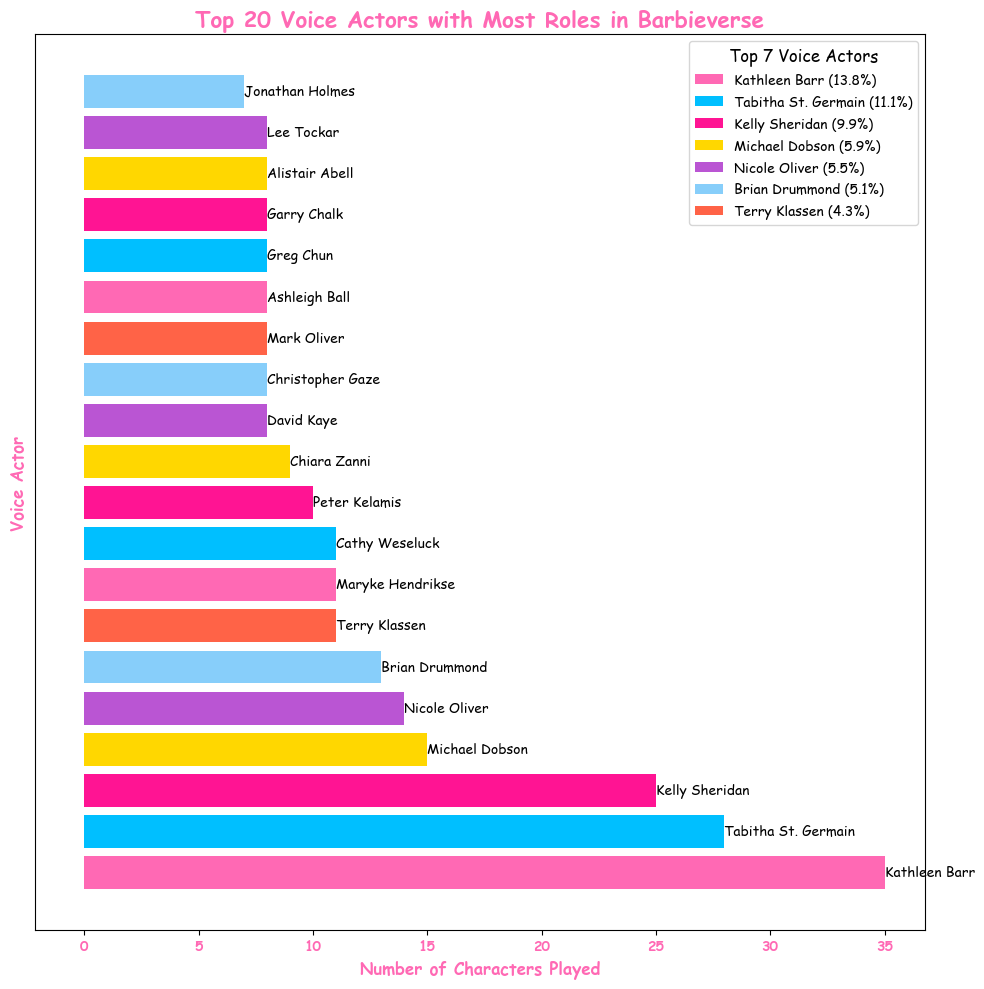

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
barbie = pd.read_csv(r'desktop/barbieverse.csv')

# Define custom Barbie color palette
barbie_colors = ['#FF69B4', '#00BFFF', '#FF1493', '#FFD700', '#BA55D3', '#87CEFA', '#FF6347']

# Set Barbie font
plt.rcParams['font.family'] = 'Comic Sans MS'

# Group by voice actor and count the number of appearances in each role
voice_actor_roles = barbie.groupby('Speaking Voice')['Character Name'].nunique()

# Sort by the number of roles and select the top 20 voice actors
top_voice_actors = voice_actor_roles.sort_values(ascending=False).head(20)

# Plotting
plt.figure(figsize=(10, 10))

# Create the horizontal bar chart
bars = plt.barh(top_voice_actors.index, top_voice_actors, color=barbie_colors)

# Add names next to each bar
for bar, actor in zip(bars, top_voice_actors.index):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, actor, ha='left', va='center', fontsize=10, color='black')

# Set legend with percentages next to names
legend_labels = [f'{actor} ({count:.1f}%)' for actor, count in zip(top_voice_actors.index, (top_voice_actors / top_voice_actors.sum()) * 100)]
legend_handles = [plt.bar(0, 0, color=color, label=label) for color, label in zip(barbie_colors, legend_labels)]
plt.legend(handles=legend_handles, loc="best", fontsize=10, title='Top 7 Voice Actors', title_fontsize=12)

# Add y-axis label
plt.ylabel('Voice Actor', fontsize=12, fontweight='bold', color='#FF69B4')

plt.title('Top 20 Voice Actors with Most Roles in Barbieverse', fontsize=16, fontweight='bold', color='#FF69B4')
plt.xlabel('Number of Characters Played', fontsize=12, fontweight='bold', color='#FF69B4')
plt.xticks(fontsize=10, fontweight='bold', color='#FF69B4')
plt.yticks([])  # Empty list to remove y-axis ticks

plt.tight_layout()
plt.show()



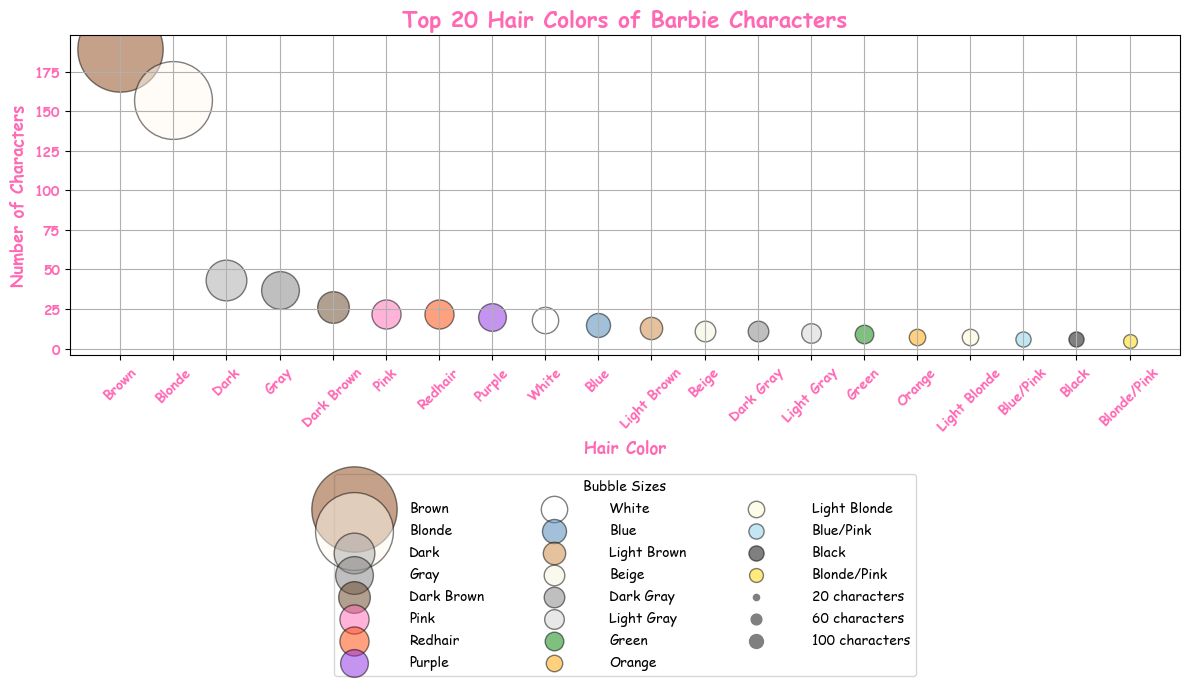

In [105]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
barbie = pd.read_csv(r'desktop/barbieverse.csv')

# Count the number of characters with each hair color
hair_color_counts = barbie['Hair'].value_counts().head(20)

# Define Barbie-inspired colors for hair colors
barbie_hair_colors = {
    'Blonde': '#FFFAF0',         # Beige
    'Brown': '#8B4513',          # Dark brown
    'Black': '#000000',          # Black
    'Red': '#FF0000',            # Bright red
    'Pink': '#FF69B4',           # Pink
    'Purple': '#8A2BE2',         # Purple
    'Multicolor': '#FFD700',     # Barbie gold for multicolor
    'Dark': '#A9A9A9',           # Dark gray
    'Dark Brown': '#654321',     # Dark brown
    'White': '#FFFFFF',          # White
    'Blue': '#4682B4',           # Light blue
    'Light Brown': '#CD853F',    # Light brown
    'Reddish Brown': '#8B0000',  # Reddish brown
    'Light Blonde': '#FAFAD2',   # Light blonde
    'Orange': '#FFA500',         # Orange
    'Green': '#008000',          # Green
    'Light Gray': '#D3D3D3',     # Light gray
    'Beige': '#F5F5DC',          # Beige
    'Blue/Pink': '#87CEEB',      # Blueish pink
    'Blonde/Pink': '#FFD700',    # Yellowish pink
    'Redhair': '#FF4500'         # Vivid red for "Redhair"
}

# Define bubble sizes based on the number of characters
bubble_sizes = hair_color_counts * 20  # Adjust the scale as needed

# Plotting
plt.figure(figsize=(12, 8))  # Larger size

# Create the bubble chart
for hair_color, count in hair_color_counts.items():
    color = barbie_hair_colors.get(hair_color, 'gray')  # Get the corresponding color from the palette
    plt.scatter(hair_color, count, s=bubble_sizes[hair_color], color=color, alpha=0.5, edgecolors='black', linewidth=1, label=hair_color)

# Customizing the bubble chart to resemble Barbie elements
plt.title('Top 20 Hair Colors of Barbie Characters', fontsize=16, fontweight='bold', color='#FF69B4')
plt.xlabel('Hair Color', fontsize=12, fontweight='bold', color='#FF69B4')
plt.ylabel('Number of Characters', fontsize=12, fontweight='bold', color='#FF69B4')
plt.xticks(fontsize=10, fontweight='bold', color='#FF69B4', rotation=45)
plt.yticks(fontsize=10, fontweight='bold', color='#FF69B4')
plt.grid(True)

# Create a legend for bubble sizes
legend_sizes = {'20 characters': 20, '60 characters': 60, '100 characters': 100}
for label, size in legend_sizes.items():
    plt.scatter([], [], s=size, color='gray', label=label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.35), fontsize=10, ncol=3, title='Bubble Sizes', handletextpad=3, columnspacing=4)

plt.tight_layout()
plt.show()